In [2]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

# Add src directory to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src")))

# Import custom modules
from data_loader import load_news_data

from eda_news import (
    headline_lengths, publisher_counts, publication_trends, hourly_distribution,
    extract_domains, top_keywords, generate_wordcloud, lda_topics, extract_events
)

# Load data
news_df = load_news_data("../Data/raw_analyst_ratings.csv")
news_df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
#add headline lengths
news_df = headline_lengths(news_df)
news_df['headline_length'].describe()


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

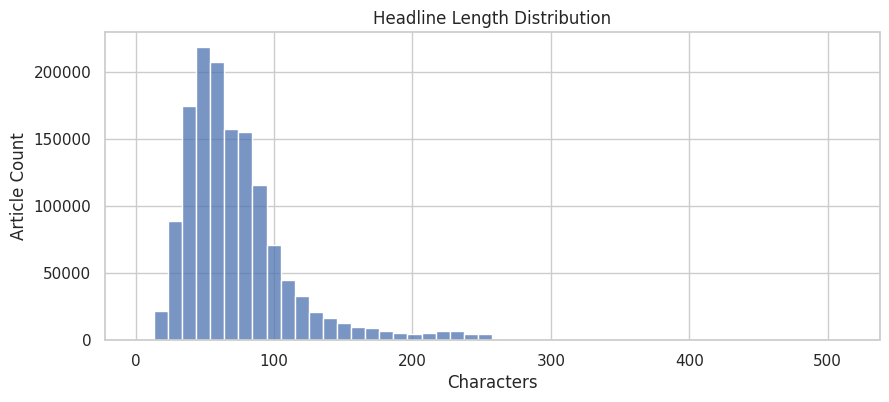

In [ ]:
# Plot Headline Length Distribution
news_df = headline_lengths(news_df)

plt.figure(figsize=(10, 4))
sns.histplot(news_df["headline_length"], bins=50)
plt.title("Headline Length Distribution")
plt.xlabel("Characters")
plt.ylabel("Number of Headlines")
plt.grid(True)
plt.show()



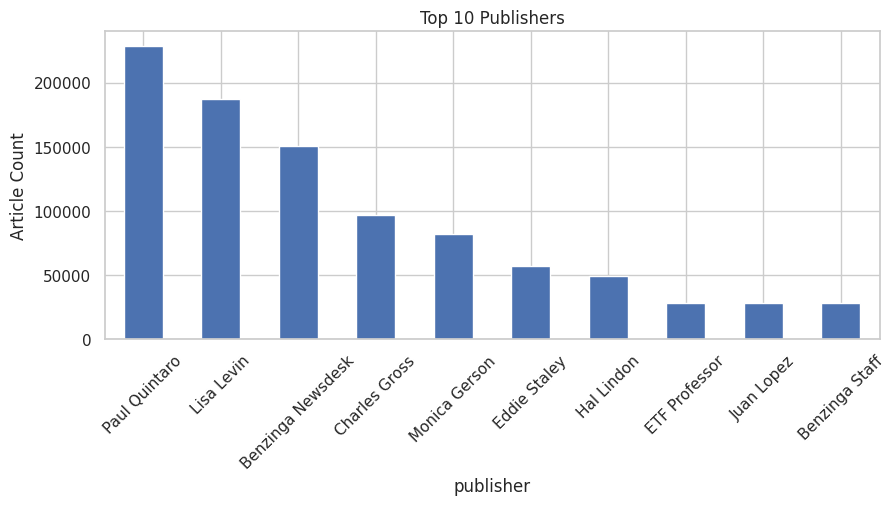

In [14]:
#top publishers
top_publishers = publisher_counts(news_df)

plt.figure(figsize=(10, 4))
top_publishers.plot(kind="bar")
plt.title("Top 10 Publishers")
plt.ylabel("Article Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



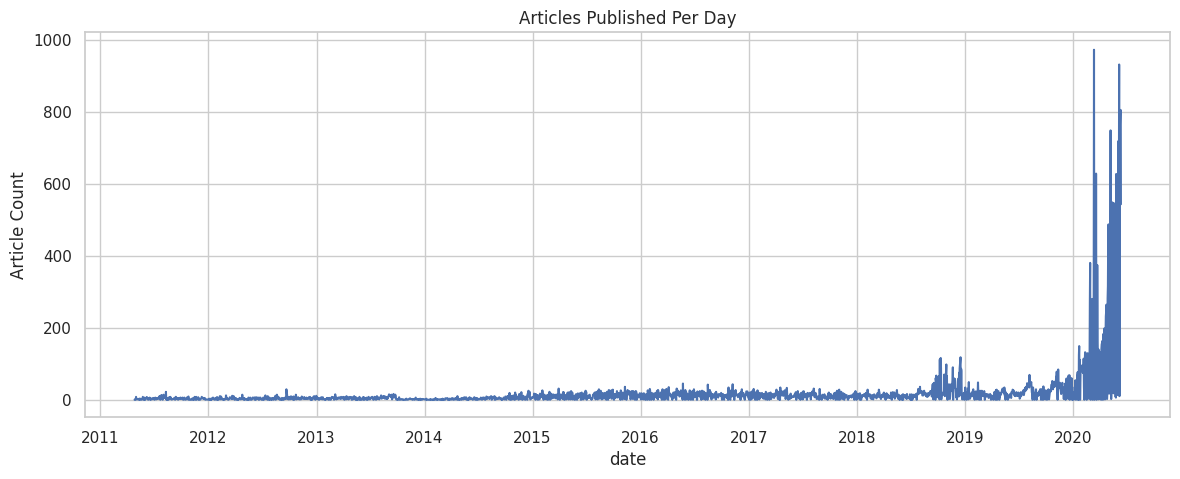

In [15]:
# daily publication trends
daily = publication_trends(news_df)

plt.figure(figsize=(14, 5))
daily.plot()
plt.title("Articles Published Per Day")
plt.ylabel("Article Count")
plt.grid(True)
plt.show()



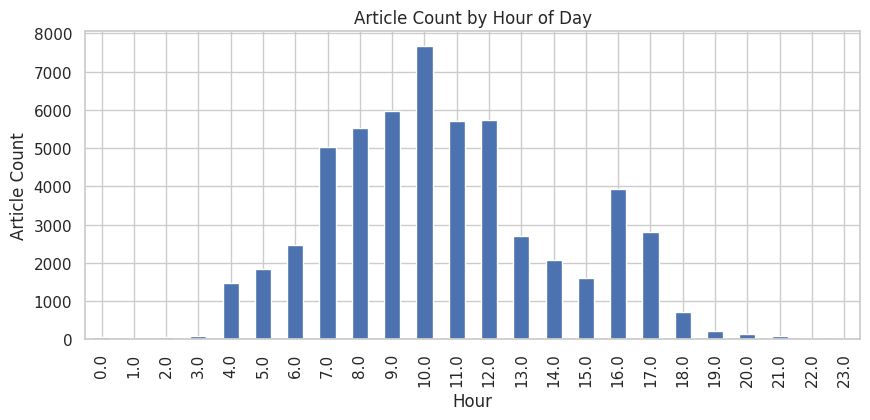

In [16]:
#hourly publlishing times 
hourly = hourly_distribution(news_df)

plt.figure(figsize=(10, 4))
hourly.plot(kind="bar")
plt.title("Article Count by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Article Count")
plt.grid(True)
plt.show()


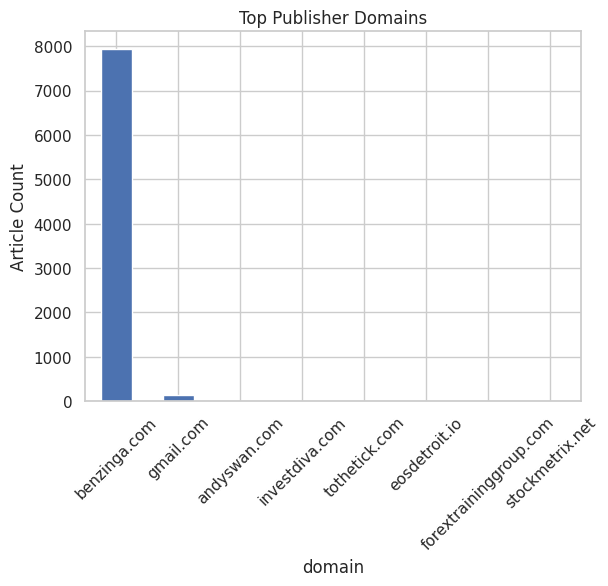

In [17]:
#publisher domain
news_df = extract_domains(news_df)

if news_df['domain'].notna().any():
    news_df['domain'].value_counts().head(10).plot(kind="bar")
    plt.title("Top Publisher Domains")
    plt.ylabel("Article Count")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
else:
    print("No email-style domains found in publisher.")


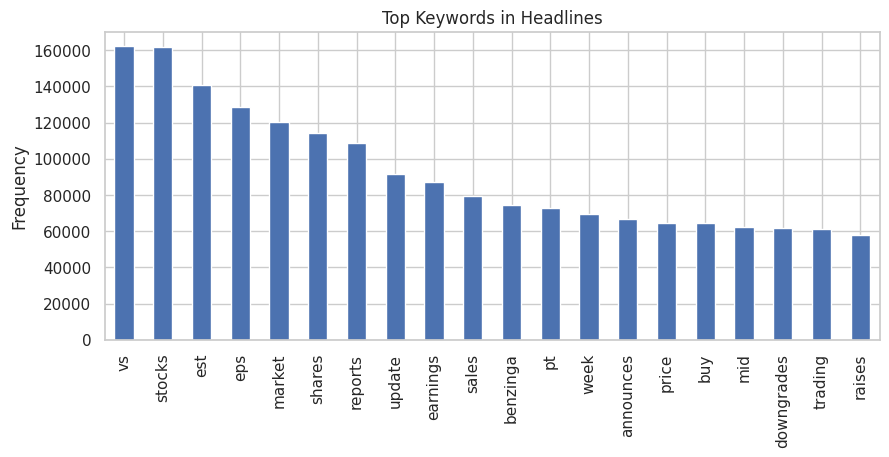

In [18]:
#keyword_freqequency 
keywords = top_keywords(news_df)
keywords.plot(kind="bar", figsize=(10, 4))
plt.title("Top Keywords in Headlines")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


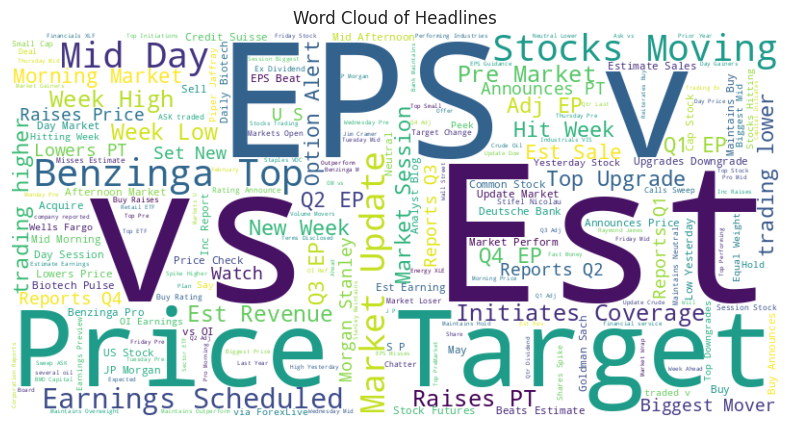

In [19]:
# word cloud
wordcloud = generate_wordcloud(news_df)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Headlines")
plt.show()


In [ ]:
#topic modleing (LDA)
topics = lda_topics(news_df, num_topics=5, num_words=10)

# Display topics
for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

"""
Topic 1: Analyst rating & price target changes — "buy", "target", "upgrades", "maintains"

Topic 2: Earnings estimates vs actuals — "eps", "vs", "est", "q1", "q4"

Topic 3: Earnings events and reports — "scheduled", "announces", "offering"

Topic 4: Market performance and trading behavior — "shares", "trading", "lower", "higher"

Topic 5: Broader market commentary — "week", "session", "moving", "update"""

Topic 1: pt, buy, target, maintains, raises, price, 00, downgrades, announces, upgrades
Topic 2: vs, est, eps, reports, sales, q4, q1, estimate, q2, q3
Topic 3: earnings, stock, scheduled, share, says, announces, shares, reports, ahead, offering
Topic 4: shares, trading, higher, companies, lower, oil, earnings, analyst, market, following
Topic 5: stocks, market, benzinga, week, mid, 52, day, session, moving, update


In [ ]:
#named entity recognition (NER)
# so we can use libriaires like SPAcy OR flir TO EXTRACT NAMED ENTITIES
import spacy
nlp = spacy.load("en_core_web_sm")

text = "Pfizer announces FDA approval for new cancer drug."

doc = nlp(text)
for ent in doc.ents:
    print(ent.text, ent.label_)
#EXpected outputs
#Pfizer → ORG

#FDA → ORG

#cancer drug → PRODUCT

FDA ORG


In [22]:
#cusom phrase extraction (Regex + rule based)
import re

def extract_events(text):
    patterns = [
        r'\bprice target\b',
        r'\bFDA approval\b',
        r'\bearnings (beat|miss)\b',
        r'\bbuyback\b',
        r'\blayoffs\b',
        r'\bacquisition\b',
        r'\bmerger\b'
    ]
    found = []
    for pattern in patterns:
        matches = re.findall(pattern, text.lower())
        found.extend(matches)
    return found


In [23]:
news_df["events"] = news_df["headline"].apply(extract_events)


In [24]:
subset = news_df[news_df["headline"].str.contains("price target|FDA|upgrade|downgrade", case=False)]
